In [ ]:
import numpy as np
from astropy import constants, units
import matplotlib.pyplot as plt

### Temperature dependence of the excitation fraction (assuming no ionisation)
##### The gas of hydrogen atoms is assumed to consist of two states: the ground state (n=1) and the first excited state (n=2).

In [ ]:
# Excitation fraction from the Boltzmann Equation
T = np.geomspace(3000, 100000, num=100) * units.K
IP = 0.5 * constants.alpha**2 * constants.m_e * constants.c**2
N2_by_N1 = (2 * 2**2) / (2 * 1**2) * np.exp(-IP * (1 / 1**2 - 1 / 2**2) / constants.k_B / T)

(1e-15, 4)

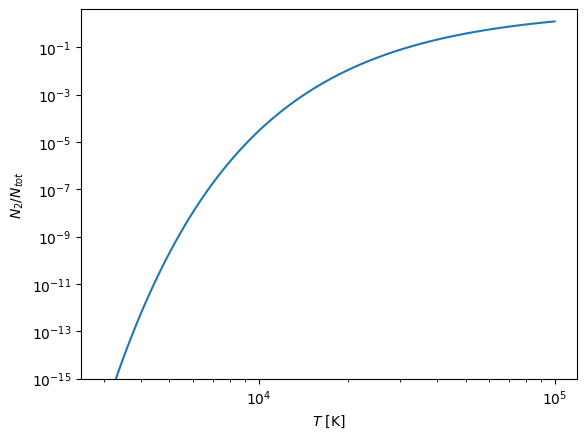

In [ ]:
N2_by_Ntot = N2_by_N1 / (1 + N2_by_N1)

plt.plot(T, N2_by_N1)
plt.xlabel(r'$T$ [K]')
plt.ylabel(r'$N_{2}/N_{tot}$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-15, 4)

### According to the Boltzmann Equation, the excitation fraction increases with temperature. As the temperature approaches infinity, the fraction tends to the ratio of the degeneracies of the two states. In this case, that value is 4 ($\frac{2 \times 2^2}{2 \times 1^2}$).

### Pressure ionisation determines the highest excited state of the hydrogen atom.
##### Given the density of atoms, we can compute the Debye screening length and compare it to the size expected for each atom based on the Bohr Model.
##### The radius of the Bohr atom with $m_{\rm max}$ energy levels must be at most equal to the Debye screening length $\lambda_{\rm D}$.

In [ ]:
import numpy as np
from astropy import constants, units
def Bohr_radius(m_max):
    return constants.a0 * m_max**2


def Debye_length(n, T):
    return np.sqrt(constants.eps0 * constants.k_B * T / n / constants.e.si**2)

n = np.array([1e31, 1e6]) * units.m**-3
T = np.array([1e7, 5770]) * units.K

for nn, tt in zip(n, T):
    print(f'm_max for n = {nn}, T = {tt}: {np.sqrt(Debye_length(nn, tt) / constants.a0).to("")}')

m_max for n = 1e+31 1 / m3, T = 10000000.0 K: 1.141963544164133
m_max for n = 1000000.0 1 / m3, T = 5770.0 K: 314735.8347960688
